In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data = data.dropna()
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
# Вывод названий столбцов
from sklearn.preprocessing import LabelEncoder
print(data.columns.tolist())
le = LabelEncoder()
data["RiskLevel"] = le.fit_transform(data["RiskLevel"])

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']


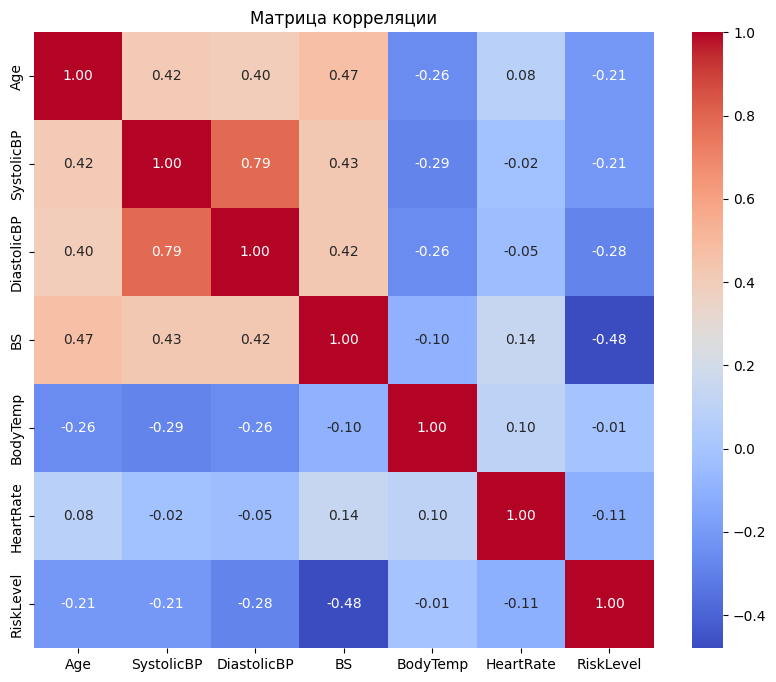

In [4]:
# Вычисление матрицы корреляции
correlation_matrix = data.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [5]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
import pandas as pd
from imblearn.over_sampling import SMOTE

X = data.drop('RiskLevel', axis=1)  
y = data['RiskLevel']

# Инициализация SMOTE
smote = SMOTE(random_state=42)

# Применение SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Объединение обратно в DataFrame
data = pd.DataFrame(X_resampled, columns=X.columns)
data['RiskLevel'] = y_resampled

features = ['Age', 'SystolicBP','DiastolicBP']
vals = features
df= data[features].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [6]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

In [7]:

X = data.drop(["RiskLevel"], axis=1)
y = data["RiskLevel"]
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


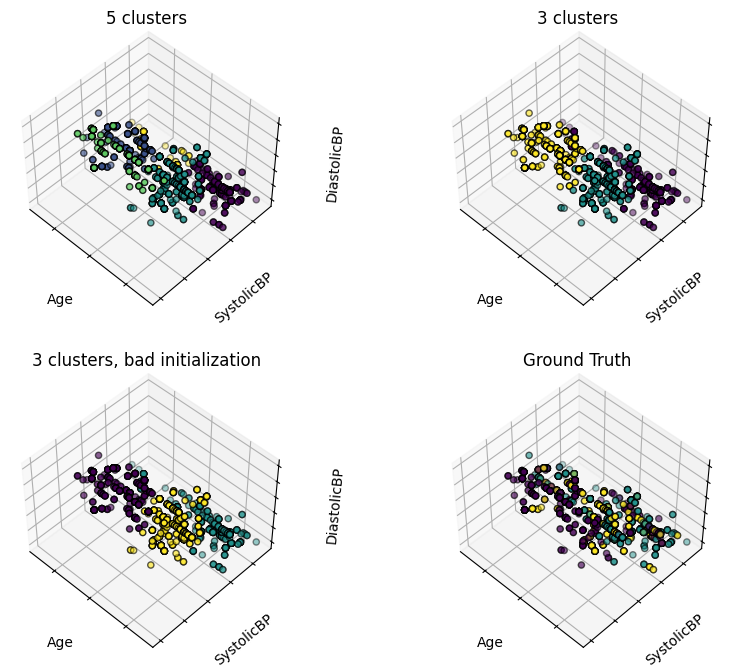

In [8]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=5)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["5 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['Age'], X['SystolicBP'], X['DiastolicBP'], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('SystolicBP')
    ax.set_zlabel('DiastolicBP')
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = data[data["RiskLevel"]==name]
    ax.text3D(
        ds['Age'].mean(),
        ds['SystolicBP'].mean(),
        ds['DiastolicBP'].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X['Age'], X['SystolicBP'], X['DiastolicBP'], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('SystolicBP')
ax.set_zlabel('DiastolicBP')
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [9]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [10]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [11]:
best_metric

[3,
 0.3728685300043959,
 0.15018977407894155,
 array([[ 23.25268817,  90.2311828 ,  61.51612903,   7.71881941,
          99.33869774,  74.94354839],
        [ 24.98541667, 119.95208333,  79.1125    ,   7.4126075 ,
          98.66699977,  72.84166667],
        [ 44.58469945, 131.34972678,  91.07377049,  12.37272276,
          98.14140771,  76.42076503]])]

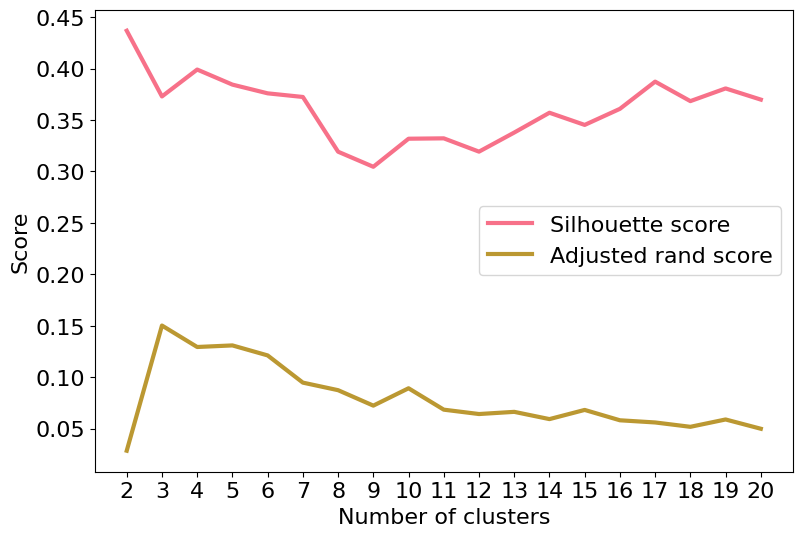

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()



In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram

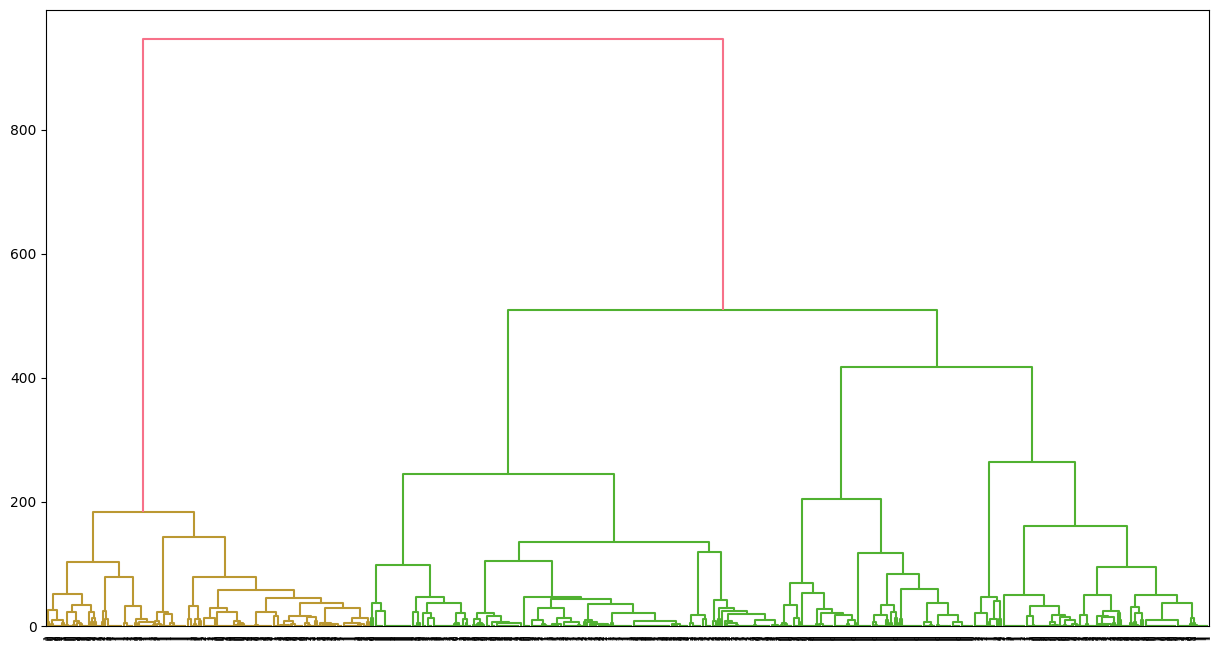

In [14]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [16]:
mins = X.shape[1]

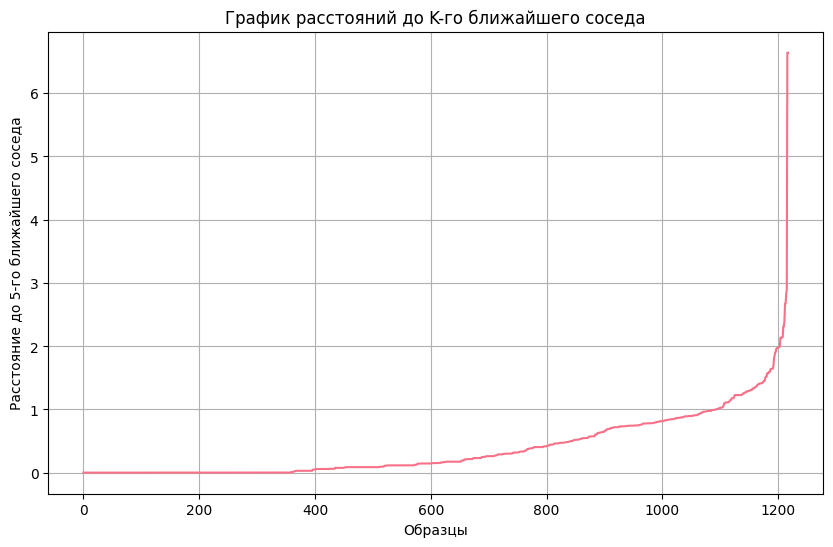

In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Предположим, мы используем все числовые колонки в датасете
X = data.select_dtypes(include=[np.number]).values

# Стандартизация данных
X_scaled = StandardScaler().fit_transform(X)

# Подбор min_samples
min_samples = 5 # Начнем с 5

# Поиск eps с помощью KNN
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Сортировка расстояний
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Построение графика зависимости расстояний
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('График расстояний до K-го ближайшего соседа')
plt.xlabel('Образцы')
plt.ylabel(f'Расстояние до {min_samples}-го ближайшего соседа')
plt.grid()
plt.show()

Лучшие параметры: eps=1.0, min_samples=1
Лучший силуэтный коэффициент: 0.8323095665574797


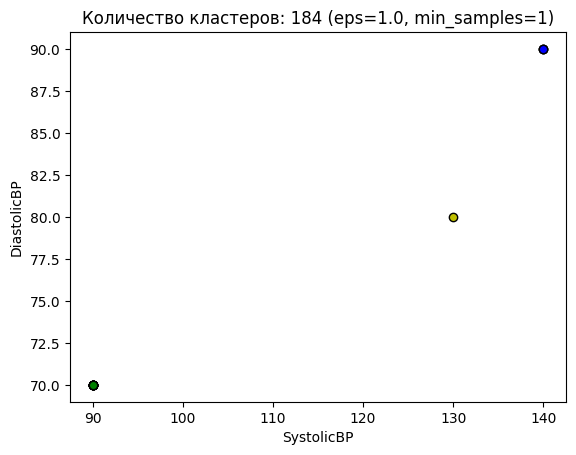

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Ваши данные
X = data[['Age','SystolicBP','DiastolicBP']]

# Параметры для поиска оптимальных значений
eps_values = np.linspace(1, 50, 1)  # Измените диапазон по необходимости
min_samples_values = range(1, 20)

best_eps = None
best_min_samples = None
best_score = -1  # Силаэтный коэффициент может быть отрицательным, если плохая кластеризация

# Перебор значений eps и min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Применение DBSCAN с текущими параметрами
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)

        # Проверка на наличие кластеров (игнорируем шум, если он есть)
        if len(set(labels)) > 1:  # Если есть хотя бы два кластера
            try:
                score = silhouette_score(X, labels)  # Оценка качества кластеризации
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
            except ValueError:
                # В случае ошибки, например, если все точки отнесены к одному кластеру
                pass

print(f"Лучшие параметры: eps={best_eps}, min_samples={best_min_samples}")
print(f"Лучший силуэтный коэффициент: {best_score}")

# Применение DBSCAN с оптимальными параметрами
db = DBSCAN(eps=1, min_samples=1).fit(X)
labels = db.labels_

# Построение результата
unique_labels = set(labels)
colors = ['y', 'b', 'g']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный цвет используется для шума.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy['SystolicBP'], xy['DiastolicBP'], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Количество кластеров: {len(set(labels))} (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('SystolicBP')
plt.ylabel('DiastolicBP')
plt.show()


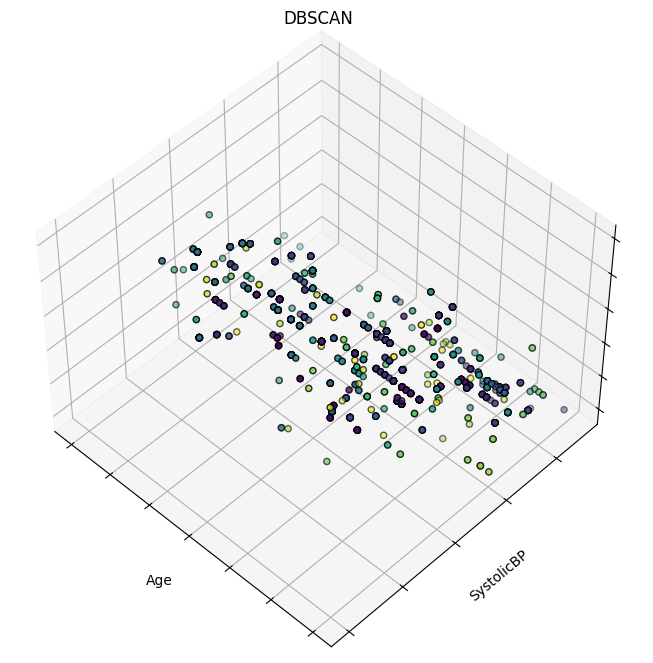

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X['Age'], X['SystolicBP'], X['DiastolicBP'], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('SystolicBP')
ax.set_zlabel('DiastolicBP')
ax.set_title("DBSCAN")

plt.show()

In [20]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# Предполагается, что у вас уже есть labels и истинные метки y
# Например, y может быть истинными метками классов

# Метрики оценки
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.2f" % sc)

ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient: 0.83
Adjusted Rand Index: 0.02
